Name: Yiğit Özgümüş

I hereby declare that I observed the honour code of the university when preparing the homework.

# Part 1

 We are given a model such that, 
 
 \begin{eqnarray}
A & \sim & \mathcal{N}(A;0,1.2) \\
R & \sim & \mathcal{IG}(R;0.4,250) \\
x_k | x_{k-1},A,R & \sim & \mathcal{N}(x_k;Ax_{k-1},R)\\
x_0 = 1 &, & x_1 = -6
\end{eqnarray}

## 1-) Draw the directed graphical model and the factor graph

* Proposed directed graphical model of the given model is: 

<img src="dag1.png">

* Proposed factor graph model of the given model is : 

<img src="factor1.png">

## 2-) Write the expression for the full joint distribution and assign terms to the individual factors on the factor graph

* If we consider the version of the model with K = 2 to easily show all factor term assignments

** Step 1:  Write down the log of the full joint (unnormalised) posterior $log \phi = p(A, R, x_1=\hat{x}_1 | x_0=\hat{x}_0)$ **

Given that $P=1.2, \nu=0.4, \beta=100$

\begin{eqnarray}
\phi & = & p(A, R, x_1=\hat{x}_1 | x_0=\hat{x}_0) \propto p(x_1 | x_0, A, R) p(A) p(R) \\[10pt]
& = &  N(x_1; Ax_0, R) N(A; 0, P) IG(R, \nu, \beta/\nu) \\[10pt]
& \propto & exp\left( -\frac{1}{2} \frac{x_1^2}{R} + x_0 x_1 \frac{A}{R} - \frac{1}{2} \frac{x_0^2 A^2}{R} - \frac{1}{2} log 2\pi R \right) \\[10pt]
& & exp\left( -\frac{1}{2} \frac{A^2}{P} - \frac{1}{2} log|2 \pi P| \right) \\[10pt]
& & exp\left( -(\nu+1) logR - \frac{\nu}{\beta} \frac{1}{R} - log \Gamma(\nu) + \nu log(\beta/\nu) \right)
\end{eqnarray}


** Step 2:  Assign each term of $log \phi$ to individual factors **

\begin{eqnarray}
log \phi & = & -\frac{1}{2} \frac{x_1^2}{R} + x_0 x_1 \frac{A}{R} - \frac{1}{2} \frac{x_0^2 A^2}{R} - \frac{1}{2} log 2\pi R -\frac{1}{2} \frac{A^2}{P} - \frac{1}{2} log|2 \pi P| -(\nu+1) logR - \frac{\beta}{\nu} \frac{1}{R} - log \Gamma(\nu) + \nu log(\nu/\beta) \\[10pt]
& = & -\frac{1}{2} \frac{x_1^2}{R} + x_0 x_1 \frac{A}{R} - \frac{1}{2} \frac{x_0^2 A^2}{R} - \frac{1}{2} logR - \frac{1}{2} \frac{A^2}{P} -(\nu+1) logR - \frac{\nu}{\beta} \frac{1}{R} + C
\end{eqnarray}


If we eliminate the constants and seperate the factors from the main derivation: 

* For factor f1 :

\begin{eqnarray}
\log \phi_A & = & \frac{-1}{2}\frac{A^2}{P} \\[10pt]
\phi_A & = &  exp(\frac{-1}{2}\frac{A^2}{P} )
\end{eqnarray}

* For factor f2 :

\begin{eqnarray}
\log \phi_R & = & -(v + 1 + \frac{1}{2}) \log{R}- (\frac{v}{\beta} + \frac{1}{2}x_1^2)\frac{1}{R} \\[10pt]
\phi_R & = &  exp( -(v + 1 + \frac{1}{2}) \log{R}- (\frac{v}{\beta} + \frac{1}{2}x_1^2)\frac{1}{R} )
\end{eqnarray}

* For factor f3:

\begin{eqnarray}
\log \phi_{x_{01}} & = & x_0x_1 \frac{A}{R} - \frac{1}{2}\frac{x_0^2 A^2}{R} \\[10pt]
\phi_{x_{01}} & = &  exp( x_0x_1 \frac{A}{R} - \frac{1}{2}\frac{x_0^2 A^2}{R} )
\end{eqnarray}


<img style="float: left; width: 400px" src="dag2.png">
<img style="float: right; width: 400px" src="factor3.jpeg">



### 3-) Derive the full conditional distributions $p(A|R,x0,x1)$ and $p(R|A,x0,x1)$

* For the first example, since R is given information, there isn't any additional information we can gain from the factor $\phi_R$. So we can derive the conditional distribution as the multiplication of the the factors $f1$ and $f3$

\begin{eqnarray}
P(A | R,x_0, x_1) & = & exp\left(\frac{-1}{2}\frac{A^2}{P} \right) * exp\left( x_0x_1 \frac{A}{R} - \frac{1}{2}\frac{x_0^2 A^2}{R} \right) \\
P(A | R,x_0, x_1) & =  & exp\left(\frac{-1}{2}\frac{A^2}{P} + x_0x_1 \frac{A}{R} - \frac{1}{2}\frac{x_0^2 A^2}{R} \right)
\end{eqnarray}

* For the first example, since R is given information, there isn't any additional information we can gain from the factor $\phi_R$. So we can derive the conditional distribution as the multiplication of the the factors $f2$ and $f3$

\begin{eqnarray}
P(A | R,x_0, x_1) & = & exp\left( -(v + 1 + \frac{1}{2}) \log{R}- (\frac{v}{\beta} + \frac{1}{2}x_1^2)\frac{1}{R} \right) * exp\left( x_0x_1 \frac{A}{R} - \frac{1}{2}\frac{x_0^2 A^2}{R} \right)\\
P(A | R,x_0, x_1) & = & exp\left( -(v + 1 + \frac{1}{2}) \log{R}- (\frac{v}{\beta} + \frac{1}{2}x_1^2)\frac{1}{R} ) + x_0x_1 \frac{A}{R} - \frac{1}{2}\frac{x_0^2 A^2}{R}\right)
\end{eqnarray}

### 4-) Derive the joint distribution $ p(A, R, x0 = 1, x1 = −6)$ and create a contour plot.

* First we need to extract our $P$, $\nu$ and $\beta$. Our values are: 
$ P = 1,2$, $\nu = 0.4$ and $\beta = 100$

* Secondly, since we found our joint distribution in part 2, we can write that

\begin{eqnarray}
p(A, R, x_1=-6 , x_0=0)& \propto &p(x_1 | x_0, A, R) p(A) p(R)\\[10pt]
& = &  N(x_1; Ax_0, R) N(A; 0, P) IG(R, \nu, \nu/\beta) \\[10pt]
& \propto & exp\left( -\frac{1}{2} \frac{x_1^2}{R} + x_0 x_1 \frac{A}{R} - \frac{1}{2} \frac{x_0^2 A^2}{R} - \frac{1}{2} log 2\pi R \right) \\[10pt]
& & exp\left( -\frac{1}{2} \frac{A^2}{P} - \frac{1}{2} log|2 \pi P| \right) \\[10pt]
& & exp\left( -(\nu+1) logR - \frac{\nu}{\beta} \frac{1}{R} - log \Gamma(\nu) + \nu log(\beta/\nu) \right)\\[10pt]
& \propto & exp\left( -\frac{18}{R} + - \frac{6A}{R} -  \frac{A^2}{2R} - \frac{1}{2} log 2\pi R \right) \\[10pt]
& & exp\left( - \frac{A^2}{2.4} - \frac{1}{2} log|2.4\pi | \right) \\[10pt]
& & exp\left( -(1.4) logR - \frac{250}{R} - log \Gamma(0.4) + 0.4 log(250) \right)
\end{eqnarray}

* Lastly we mimic A and R between $(10^-4,10^4)$ and $(-8,6)$ respectively and compute our values using these vectors. You can see the contour plot below

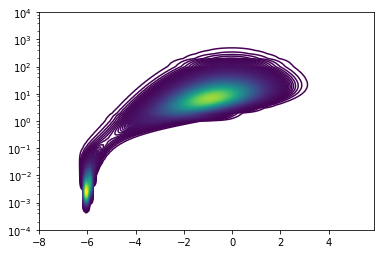

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.special as sps

from IPython.display import display, Math, Latex
%matplotlib inline
from IPython.core.interactiveshell import InteractiveShell
#InteractiveShell.ast_node_interactivity = "last_expr"

P = 1.2
nu = 0.4
beta = 100
x_0 = 1
x_1 = -6
Z = []

A = [-8 + x*(6-(-8))/100. for x in range(100)]
R = [0.0001 + x*(0.01-(0.0001))/100. for x in range(100)] + \
    [0.01 + x*(1-(0.01))/100. for x in range(100)] + \
    [1 + x*(100-(1))/100. for x in range(100)] + \
    [100 + x*(10000-(100))/100. for x in range(100)]
for r in R:
    temp = []
    for a in A:
        expression = (-0.5*x_1*x_1/r+x_0*x_1*a/r-0.5*x_0*x_0*a*a/r-0.5*np.log(2*np.pi*r))+\
                     (-0.5*a*a/P) +\
                     (-(nu+1)*np.log(r)-nu/(beta*r))
        temp.append(np.exp(expression))
    Z.append(temp)
Z = np.array(Z)
CS = plt.contour(A,R,Z,500)
plt.yscale('log')
plt.show()

# Part 2

 We are given a model such that, 
 
\begin{eqnarray}
A & \sim & \mathcal{N}(A;0,P) \\
R & \sim & \mathcal{IG}(R;\nu,\frac{\nu}{\beta}) \\
x_k | x_{k-1},A,R & \sim & \mathcal{N}(x_k;Ax_{k-1},R)\\
x_0 = 1 &, & x_1 = -6
\end{eqnarray}

where $\mathcal{N}$ is a Gaussian and

\begin{eqnarray}
\mathcal{IG}(R;a,b) & = &  exp\left( -(a+1) logR - \frac{b}{R} - log \Gamma(a) + a log(b) \right)
\end{eqnarray}

\begin{eqnarray}
\nu = 0.4 &\quad& \beta = 100 &\quad& P = 1.2\\
x_0 = 1 &\quad & x_1 = -6 & 
\end{eqnarray}



### 1-) Derive and implement an EM algorithm to find the MAP estimate $R^* = argmax_R p(R|x_0,x_1,\theta))$

### 2-) Derive and implement an EM algorithm to find the MAP estimate $A^* = argmax_A p(A|x_0,x_1,\theta))$